In [ ]:
import numpy as np
import pandas as pd
import queue
import matplotlib.pyplot as plt

    Smoke  Lungs Capacity Cancer
0       0              10     No
1       0              11     No
2       1              10     No
3       2               9     No
4       0               9     No
5       1               9    Yes
6       3              10     No
7       3               8    Yes
8       3               8    Yes
9       3               9     No
10      5               6    Yes
11      5               6    Yes
12      7               6    Yes
13      7               8    Yes
14      8               5    Yes


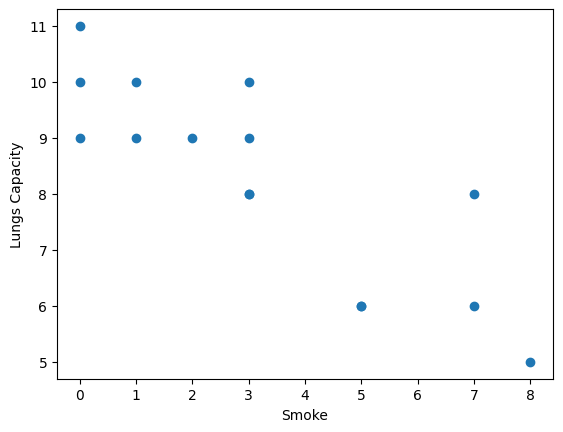

Distances to each point in the dataset: [5, 5, 4, 3, 5, 4, 2, 2, 2, 2, 4, 4, 4, 2, 5]


[5, 5, 4, 3, 5, 4, 2, 2, 2, 2, 4, 4, 4, 2, 5]

In [4]:
file = pd.read_csv("file1.csv")
print(file)
X_Axis = file[['Smoke', 'Lungs Capacity']].values
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))
plt.scatter(X_Axis[:, 0], X_Axis[:, 1])
plt.xlabel('Smoke')
plt.ylabel('Lungs Capacity')
plt.show()
smoke_value = int(input("Please enter how many hours you smoke per day: "))
lung_capacity = int(input("Please input your lung capacity level: "))
user_point = np.array([smoke_value, lung_capacity])
distances = [int(euclidean_distance(user_point, point)) for point in X_Axis]
print("Distances to each point in the dataset:", distances)
k = 3#Taking 3 smallest value for good results
nearest_indices = np.argsort(distances)[:k]#Doing some random function idk credit to ChatGpt
print(f"Points Are With Labeles {nearest_indices}")
Y_Axis = file['Cancer'].values
nearest_labels = Y_Axis[nearest_indices]
unique_labels, label_counts = np.unique(nearest_labels, return_counts=True)
max_count_indices = np.where(label_counts == np.max(label_counts))[0]
# If there is a tie, select all tied labels
predicted_labels = unique_labels[max_count_indices]#There won't be any tie because we getting 3 values 
print("Predicted label(s):", predicted_labels)

In [ ]:
from sklearn.model_selection import train_test_split#for training and testing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
file = pd.read_csv("file2.csv")
mean_height = file["height"].mean()
mean_mass = file["mass"].mean()
print("Mean height:", mean_height)
print("Mean mass:", mean_mass)
file["height"].fillna(mean_height, inplace=True)
file["mass"].fillna(mean_mass, inplace=True)
file["fruit_subtype"].replace("unknown", pd.NA, inplace=True)#First Replace With Nan Value
file.dropna(subset=["fruit_subtype"], inplace=True)#Then remove it
file["mass"]=file["mass"].astype(int)
file["height"]=file["height"].astype(int)
print(file)
X = file.drop(columns=['fruit_label', 'fruit_name', 'fruit_subtype'])#All values except fruit Label,fruit Name,fruit label
y = file['fruit_label']#Target Column which is fruit label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)#42 seed value for random value
#X_train: This contains the features for the training set.   X corresponds to the features.
#X_test: This contains the features for the testing set.       y corresponds to the target variable.
#y_train: This contains the target values for the training set.   X_train and y_train contain the training data.  
#y_test: This contains the target values for the testing set     X_test and y_test contain the testing data.
knn=KNeighborsClassifier(n_neighbors=3)#Taking  3 nearest value as prediction 
knn.fit(X_train,y_train)#training phase
y_predict=knn.predict(X_test)
y_predict
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)